In [1]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from collections import Counter


raw = pd.read_csv("data/Speed-Dating-Data.csv", encoding="windows-1252")

In [2]:
dropping = ["idg", "condtn", "position", "positin1", "field", "undergra", "mn_sat", "tuition", "from", "zipcode", "career",
           "exphappy", "attr4_1", "sinc4_1", "intel4_1", "fun4_1", "amb4_1", "shar4_1"]
data = raw.drop(columns = dropping)

In [3]:
sub = data.iloc[:,[0, 3, 4, 5, 8, 79]]

l = [6,10,16,18,20]

sub = sub[(sub['wave'] != 6) & (sub['wave'] != 10) & (sub['wave'] != 16) & (sub['wave'] != 18) & (sub['wave'] != 20)
         ]

print(sub[sub["wave"]==1])

     iid  wave  round  order  match  dec
0      1     1     10      4      0    1
1      1     1     10      3      0    1
2      1     1     10     10      1    1
3      1     1     10      5      1    1
4      1     1     10      7      1    1
5      1     1     10      6      0    0
6      1     1     10      1      0    1
7      1     1     10      2      0    0
8      1     1     10      8      1    1
9      1     1     10      9      0    1
10     2     1     10     10      0    0
11     2     1     10      9      0    0
12     2     1     10      6      0    0
13     2     1     10      1      1    1
14     2     1     10      3      0    0
15     2     1     10      2      0    0
16     2     1     10      7      0    1
17     2     1     10      8      0    0
18     2     1     10      4      1    1
19     2     1     10      5      0    1
20     3     1     10      6      0    0
21     3     1     10      5      0    0
22     3     1     10      2      0    0
23     3     1  

In [4]:
first5 = np.zeros([5])
last5 = np.zeros([5])
for i in range(sub.shape[0]):
    if sub.iloc[i,5] == 1:
        index = sub.iloc[i,2] - sub.iloc[i,3]
        if sub.iloc[i,3] <= 5:
            first5[sub.iloc[i,3]-1] += 1
        elif index < 5:
            last5[4-index] += 1
total = sum(first5) + sum(last5)
print("Percentage of successful dates only considering first 5 and last 5 dates")
print(first5*100/total)
print(last5*100/total)



Percentage of successful dates only considering first 5 and last 5 dates
[12.01171875  9.1796875   9.81445312 10.15625    10.00976562]
[ 9.47265625  9.47265625  9.5703125  10.3515625   9.9609375 ]


In [5]:
w = ([sub.iloc[i,3] for i in range(sub.shape[0]) if sub.iloc[i,5] == 1])
w.sort()
#print(w)
print("Total dates in order of date number")
print(Counter(w).values())
print("Percentage of successful dates for first 5 and last 5 dates considering all dates")
print(first5/sum(Counter(w).values())*100)
print(last5/sum(Counter(w).values())*100)

Total dates in order of date number
dict_values([246, 188, 201, 208, 205, 214, 199, 197, 214, 199, 149, 139, 151, 155, 134, 121, 95, 100, 85, 57, 29, 17])
Percentage of successful dates for first 5 and last 5 dates considering all dates
[7.44777475 5.69179534 6.08537693 6.29730548 6.20647896]
[5.87344838 5.87344838 5.93399939 6.41840751 6.17620345]


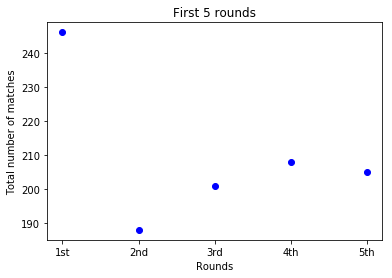

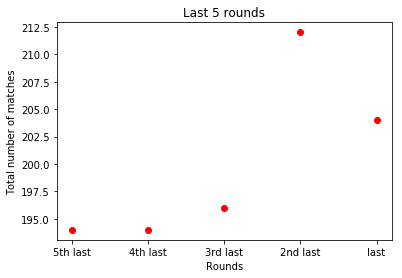

In [6]:
plt.plot(['1st','2nd','3rd','4th','5th'], first5, 'bo')
plt.ylabel('Total number of matches')
plt.xlabel('Rounds')
plt.title('First 5 rounds')
plt.show()

plt.plot(['5th last','4th last', '3rd last', '2nd last', 'last'], last5, 'ro')
plt.ylabel('Total number of matches')
plt.xlabel('Rounds')
plt.title('Last 5 rounds')
plt.show()
